## Pair Programming - Regresión lineal 5

### Normalización

---

In [32]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import kstest

import warnings
warnings.filterwarnings('ignore')

In [33]:
df = pd.read_csv("../archivos/metro_A.csv", index_col=0)

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.

En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:
- Sobre la variable respuesta, en pair programmings anterior identificastéis si seguía una distribución normal o no. En caso de que no siguiera una distribución normal, normalizarla. Podéis usar el método que prefiráis o el que mejor se ajuste.



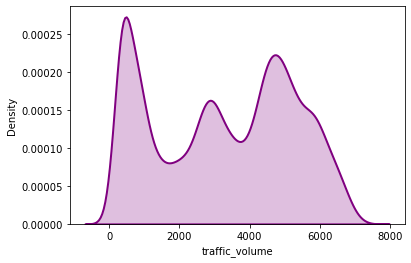

In [34]:
sns.distplot(df['traffic_volume'], hist= False, color= 'purple', kde_kws= {"shade": True, "linewidth": 2});

Observamos en la gráfica que la variable respuesta 'traffic_volume' no tiene una distribución normal de los datos ya que no tiene la forma de la campana de Gauss. 

Al ver la distribución muy anómala, obtamos por utilizar el método de normalización Boxcox.

__________
Como tenemos valores 0 decidimos sumar 1 a todos los valores para poder aplicar el boxcox

In [35]:
df["traffic_volume"] = df["traffic_volume"] + 1

### Aplicamos el método Boxcox

In [36]:
df['traffic_box'], lambda_ajustada = stats.boxcox(df['traffic_volume'])

In [40]:
lambda_ajustada

0.6876435200415945

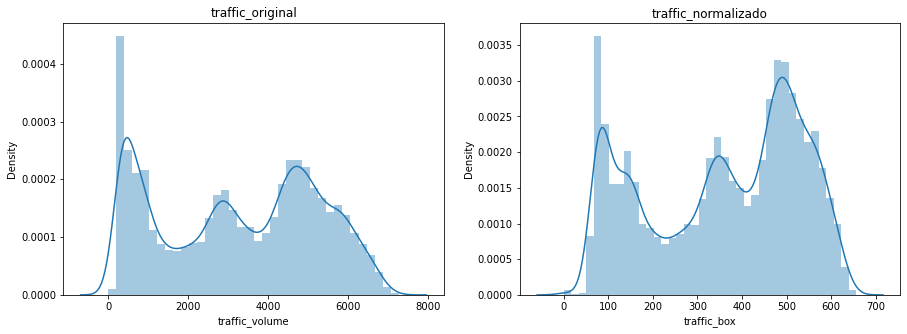

In [42]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('traffic_original')
axes[1].set_title('traffic_normalizado')

sns.distplot(df['traffic_volume'] ,ax = axes[0])
sns.distplot(df['traffic_box'], ax = axes[1]);

In [43]:
kstest(df["traffic_box"], "norm")

KstestResult(statistic=0.9993350099358272, pvalue=0.0)

Los resultados del test son < 0.05 , por lo que rechazamos la H0, los datos no son normales... pero seguimos adelante 

____

- Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [45]:
df.to_csv('../archivos/metro_B.csv')